In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**term** and **emp_length** should be in integer type.<br>
**earliest_cr_line, issue_d, last_pymnt_d, next_pymnt_d,** and **last_credit_pull_d** should be in date type

#### *cross table of home ownership, loan status, and average interest rate*

In [6]:
pd.crosstab(data['home_ownership'], data['loan_status'], values=data['int_rate'], aggfunc='mean').round(2)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,,,
ANY,NaN,NaN,NaN,NaN,NaN,11.67,NaN,NaN,NaN
MORTGAGE,15.86,13.53,16.02,14.63,14.00,12.99,15.71,16.16,15.76
NONE,15.22,21.72,NaN,15.65,7.83,14.63,NaN,NaN,NaN
OTHER,14.10,22.30,NaN,14.79,14.58,12.69,NaN,NaN,NaN
OWN,16.10,13.86,16.41,14.92,14.21,13.38,15.26,15.59,15.79
RENT,16.12,14.08,16.19,14.51,13.93,13.56,16.08,15.82,16.17


Text(0, 0.5, 'Interest Rate')

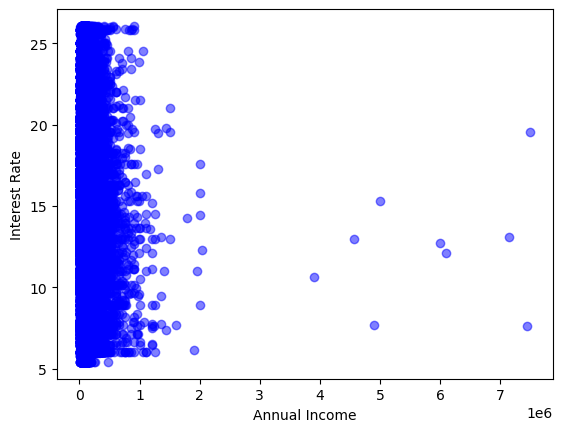

In [8]:
plt.scatter(data['annual_inc'], data['int_rate'], c='blue', alpha=0.5)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')

#### *cross table of purpose and loan status*

In [12]:
pd.crosstab(data['purpose'], data['loan_status'], margins=True)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All
purpose,,,,,,,,,,
car,425,1876,5,13,51,2966,16,7,38,5397
credit_card,7380,55892,161,69,271,38169,625,219,1371,104157
debt_consolidation,25835,133134,544,292,808,106441,1976,767,4398,274195
educational,56,0,0,32,65,269,0,0,0,422
home_improvement,2126,12453,30,71,143,11076,193,67,378,26537
house,267,714,6,11,33,1182,18,4,34,2269
major_purchase,808,3790,9,23,100,4912,64,23,99,9828
medical,523,1856,8,22,36,2054,32,8,63,4602
moving,393,1079,6,15,31,1404,15,8,43,2994


#### *cross table of home ownership, loan status, and grade*

In [14]:
pd.crosstab(data['home_ownership'], 
            [data['loan_status'], data['grade']]
           )

loan_status    Charged Off                                    Current         \
grade                    A     B     C     D     E     F    G       A      B   
home_ownership                                                                 
ANY                      0     0     0     0     0     0    0       0      0   
MORTGAGE              1294  4187  5290  4012  2534  1146  336   20774  33627   
NONE                     0     4     1     2     0     0    0       0      0   
OTHER                    2    10     4     6     3     2    0       0      0   
OWN                    220   776  1033   907   480   244   76    3196   6109   
RENT                  1011  4180  5593  4821  2693  1293  315   11221  24273   

loan_status                                   Default                        \
grade               C      D     E     F    G       A   B    C    D   E   F   
home_ownership                                                                
ANY                 0      0     0     0    0       0   0    0    0   0   0   
MORTGAGE        32524  18415  8411  2642  645      12  74  102   90  53  13   
NONE                0      0     1     1    0       0   0    0    0   0   0   
OTHER               0      0     2     1    0       0   0    0    0   0   0   
OWN              5957   3573  1746   549  142       3   7   30   13   9   6   
RENT            24870  15472  7069  2504  502      15  68  126  109  68  18   

loan_status       Does not meet the credit policy. Status:Charged Off          \
grade           G                                                   A   B   C   
home_ownership                                                                  
ANY             0                                                  0    0   0   
MORTGAGE        7                                                  5   42  68   
NONE            0                                                  0    0   0   
OTHER           0                                                  0    2   3   
OWN             1                                                  0    4   9   
RENT            8                                                  3   37  68   

loan_status                     \
grade            D   E   F   G   
home_ownership                   
ANY              0   0   0   0   
MORTGAGE        83  67  47  36   
NONE             0   0   1   0   
OTHER            1   2   0   3   
OWN             14  12   4   6   
RENT            99  77  41  27   

loan_status    Does not meet the credit policy. Status:Fully Paid            \
grade                                                           A    B    C   
home_ownership                                                                
ANY                                                             0    0    0   
MORTGAGE                                                       53  143  223   
NONE                                                            4    0    0   
OTHER                                                           1    2    5   
OWN                                                             2   17   36   
RENT                                                           30  107  217   

loan_status                      Fully Paid                                   \
grade             D    E   F   G          A      B      C      D     E     F   
home_ownership                                                                 
ANY               0    0   0   0          0      1      0      0     0     0   
MORTGAGE        211  157  59  62      21069  30696  21999  11834  5208  1923   
NONE              0    0   0   0          6     10      9      7     0     3   
OTHER             8    5   2   4         23     37     32     15     5     2   
OWN              39   31   6   7       2936   4986   3819   2278   884   359   
RENT            236  185  87  49      12421  25232  19959  11955  4472  1640   

loan_status         In Grace Period                              \
grade             G           

#### *cross table of home ownership, loan status, and average percent income*

In [17]:
pd.crosstab(data['home_ownership'], data['loan_status'], values=data['annual_inc'], aggfunc='mean').round(2)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,,,
ANY,NaN,NaN,NaN,NaN,NaN,35680.00,NaN,NaN,NaN
MORTGAGE,74293.55,84473.02,75169.58,91328.28,92756.31,84013.96,84074.56,82412.25,79571.61
NONE,48685.71,80000.00,NaN,72000.00,NaN,65529.19,NaN,NaN,NaN
OTHER,59696.70,65993.33,NaN,38220.55,69151.48,70492.03,NaN,NaN,NaN
OWN,58723.39,67221.07,54850.97,77313.30,60047.82,65548.92,68870.57,63051.15,64114.38
RENT,56881.56,63247.98,59271.40,47858.53,53523.71,62730.58,64532.56,62270.98,60023.41


#### *a box plot of percentage income by loan status* 

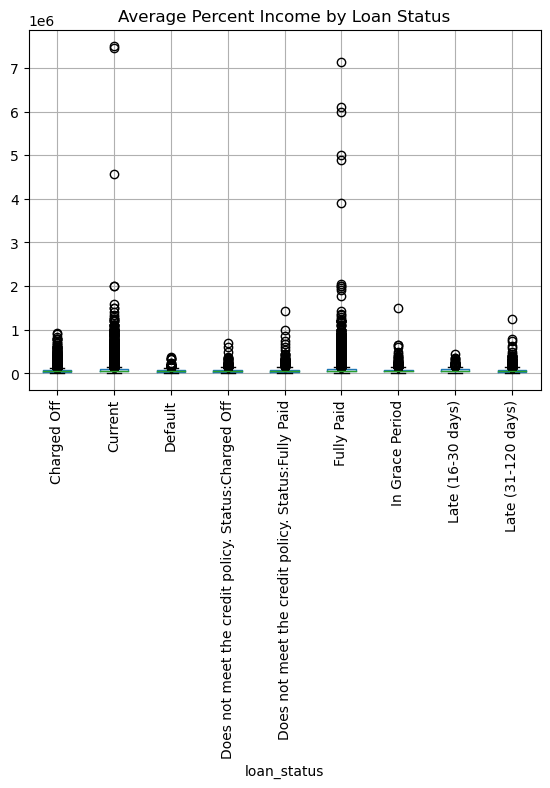

In [21]:
data.boxplot(column=['annual_inc'], by='loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.xticks(rotation = 90)
plt.show()

#### *cross table for loan status, home ownership, and the max employment length* 

In [22]:
pd.crosstab(data['loan_status'], data['home_ownership'], values=data['emp_length_int'], aggfunc='max')

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,NaN,10.0,10.0,10.0,10.0,10.0
Current,NaN,10.0,10.0,10.0,10.0,10.0
Default,NaN,10.0,NaN,NaN,10.0,10.0
Does not meet the credit policy. Status:Charged Off,NaN,10.0,6.0,10.0,10.0,10.0
Does not meet the credit policy. Status:Fully Paid,NaN,10.0,0.0,10.0,10.0,10.0
Fully Paid,5.0,10.0,10.0,10.0,10.0,10.0
In Grace Period,NaN,10.0,NaN,NaN,10.0,10.0
Late (16-30 days),NaN,10.0,NaN,NaN,10.0,10.0
Late (31-120 days),NaN,10.0,NaN,NaN,10.0,10.0


# General Preprocessing

## Correcting Data Types

In [ ]:
data['emp_length'].unique()

In [9]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years','')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year',str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace('n/a',str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years','')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year','')

data['emp_length_int'] = pd.to_numeric(data['emp_length_int'])
data.drop(columns=['emp_length'], inplace=True)

For most credit risk models, especially for **probability of default**, columns like **person_emp_length** and **person_home_ownership** are common to begin investigating.

In [10]:
pd.crosstab(data['emp_length_int'], data['home_ownership'], margins=True)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,All
emp_length_int,,,,,,,
0.0,0,12610,8,32,2772,20843,36265
1.0,0,11020,2,22,2397,16181,29622
2.0,0,16583,4,22,3298,21466,41373
3.0,0,15768,2,17,2973,17836,36596
4.0,0,12542,1,12,2272,13196,28023
5.0,1,14604,2,11,2653,13503,30774
6.0,0,13247,5,11,2144,10705,26112
7.0,0,13736,2,4,2181,10257,26180
8.0,0,12222,1,4,1828,8340,22395


In [ ]:
data['term'].unique()

In [ ]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = pd.to_numeric(data['term_int'])
data.drop(columns=['term'], inplace=True)

In [ ]:
d_str = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

data['earliest_cr_line_date'] = pd.to_datetime(data[d_str[0]], format='%b-%y')
data['issue_d_date'] = pd.to_datetime(data[d_str[1]], format='%b-%y')
data['last_pymnt_d_date'] = pd.to_datetime(data[d_str[2]], format='%b-%y')
data['next_pymnt_d_date'] = pd.to_datetime(data[d_str[3]], format='%b-%y')
data['last_credit_pull_d_date'] = pd.to_datetime(data[d_str[4]], format='%b-%y')

## General Feature Extraction

In [ ]:
time_passed_days = pd.to_datetime('2023-06-01') - data['earliest_cr_line_date']
data['mths_since_earliest_cr_line'] = round(pd.to_numeric(time_passed_days/np.timedelta64(1,'M')))

In [ ]:
data['mths_since_earliest_cr_line'].describe()

There is a negative value in the min section, which is impossible to have a negative value for months differences

Since we have 466.285 and only 1169 records with negative values, we can impute the value with other since it won't affect much to our analysis

In [ ]:
data['mths_since_earliest_cr_line'][data.mths_since_earliest_cr_line < 0] = data['mths_since_earliest_cr_line'].max()

In [ ]:
issue_time_passed_days = pd.to_datetime('2023-06-01') - data['issue_d_date']
data['mths_since_issue_date'] = round(pd.to_numeric(time_passed_days/np.timedelta64(1,'M')))

data['mths_since_issue_date'][data.mths_since_issue_date < 0] = data['mths_since_issue_date'].max()
data['mths_since_issue_date'].describe()

## Deleting Unnecessary Feature (NaN Feature)

In [ ]:
empty_features = ['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
                  'inq_fi','total_cu_tl','inq_last_12m']
data.drop(columns=empty_features, inplace=True)

## Handling Missing Value

In [ ]:
possible_knn_features = [
    'total_rev_hi_lim', 'annual_inc', 'revol_util','tot_cur_bal'
]

missing_nums_data = [
            'mths_since_earliest_cr_line','acc_now_delinq','total_acc', 
            'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'emp_length_int', 
            'mths_since_last_delinq', 'collections_12_mths_ex_med', 'collections_12_mths_ex_med', 
            'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'mths_since_issue_date', 'mths_since_last_record'
            ]

In [ ]:
from sklearn.impute import KNNImputer

nums_data = data[possible_knn_features].copy()

KNNImputer = KNNImputer(n_neighbors=5)
impute_nums_data = pd.DataFrame(KNNImputer.fit_transform(nums_data), columns=nums_data.columns)

In [ ]:
for i in range(len(missing_nums_data)):
    data[missing_nums_data[i]].fillna(0, inplace=True)

In [ ]:
missing_cats_data = ['emp_title', 'desc', 'title']

In [ ]:
from sklearn.impute import SimpleImputer

cats_data = data[missing_cats_data].copy()

imputer = SimpleImputer(strategy='constant', fill_value='missing')
impute_cats_data = pd.DataFrame(imputer.fit_transform(cats_data), columns = cats_data.columns)

In [ ]:
imputed_data = impute_nums_data.join(impute_cats_data)

In [ ]:
data = data.join(imputed_data)

# Export Clean Dataset

In [ ]:
data = pd.read_csv('cleaned_data.csv')

# Defining WoE and IV Calculation

In [ ]:
def woe_discreat(X_train, discreat_var_name, y_train):
    df = pd.concat([X_train[discreat_var_name], y_train], axis=1)
    
    #Calculate the number of observations and the proportion of good values (which is 1)
    #Since the good_bad feature only range from 0-1, calculate the mean good_bad will gives us the same result of the proportion of the good values (1)
    n_obs = df.groupby(discreat_var_name, as_index = False).agg(n_obs = (discreat_var_name, 'count'))
    prop_good = df.groupby(discreat_var_name, as_index = False).agg(prop_good = (y_train.name,'mean'))
    
    df = pd.concat([n_obs, prop_good], axis=1)
    
    #Removing the duplicate feature (only return feature from index 0,1,and 3)
    df = df.iloc[:,[0,1,3]]
    
    #calculate the percentage of observations
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    
    #calculate the n_good and the n_bad using the following formula
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    
    #calculate the percentage of the n_good and the n_bad
    df['prcnt_good'] = df['n_good']/df['n_good'].sum()
    df['prcnt_bad'] = df['n_bad']/df['n_bad'].sum()
    
    #calculate the WoE Score
    df['woe'] = np.log(df['prcnt_good'] / df['prcnt_bad'])
    
    #calculate Information Value (IV)
    df['IV'] = (df['prcnt_good'] - df['prcnt_bad'])*df['woe']
    df['IV'] = df['IV'].sum()
    
    #calculate the difference of good loan and the woe
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    
    df = df.sort_values(by='woe')
    
    return df

In [ ]:
def plot_woe(df_woe, rotation_of_axis_labels=0):
    x = np.array(df_woe.iloc[:, 0].apply(str)) #retrieve the grade feature
    y = df_woe['woe']
    
    plt.figure(figsize=(18,6))
    plt.plot(x,y, marker = 'o', linestyle='--', color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    
    plt.title(str('Weight of Evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_axis_labels)
    plt.grid()

In [ ]:
def woe_ordered_continuous(X_train, cont_var_name, y_train):
    df = pd.concat([X_train[cont_var_name], y_train], axis=1)
    
    #Calculate the number of observations and the proportion of good values (which is 1)
    #Since the good_bad feature only range from 0-1, calculate the mean good_bad will gives us the same result of the proportion of the good values (1)
    n_obs = df.groupby(cont_var_name, as_index = False).agg(n_obs = (cont_var_name, 'count'))
    prop_good = df.groupby(cont_var_name, as_index = False).agg(prop_good = (y_train.name,'mean'))
    
    df = pd.concat([n_obs, prop_good], axis=1)
    
    #Removing the duplicate feature (only return feature from index 0,1,and 3)
    df = df.iloc[:,[0,1,3]]
    
    #calculate the percentage of observations
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    
    #calculate the n_good and the n_bad using the following formula
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    
    #calculate the percentage of the n_good and the n_bad
    df['prcnt_good'] = df['n_good']/df['n_good'].sum()
    df['prcnt_bad'] = df['n_bad']/df['n_bad'].sum()
    
    #calculate the WoE Score
    df['woe'] = np.log(df['prcnt_good'] / df['prcnt_bad'])
    
    #calculate Information Value (IV)
    df['IV'] = (df['prcnt_good'] - df['prcnt_bad'])*df['woe']
    df['IV'] = df['IV'].sum()
    
    #calculate the difference of good loan and the woe
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    
    return df

# EL = PD x LGD x EAD

# Probability of Default (PD)

## Splitting Data (80/20)

In [ ]:
# Determine which is the good and bad value from the loan_status
data['good_bad'] = np.where(data['loan_status'].isin(['Charged Off', 'Late (16-30 days)','Default',
                                                     'Does not meet the credit policy. Status:Charged Off']),0,1)

In [ ]:
X = data.drop(columns=['good_bad'])
y = data['good_bad']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_pd, X_test_pd, y_train_pd, y_test_pd = train_test_split(X,y,test_size=0.2, random_state=42)

## Encoding Categorical Values

In [ ]:
cat_discreat = ['grade', 'home_ownership','verification_status','purpose','addr_state', 'initial_list_status']

In [ ]:
data_dummies_train = [pd.get_dummies(X_train_pd[cat_discreat[0]], prefix='grade', prefix_sep=':'),
                pd.get_dummies(X_train_pd[cat_discreat[1]], prefix='home_ownership', prefix_sep=':'),
                pd.get_dummies(X_train_pd[cat_discreat[2]], prefix='ver_status', prefix_sep=':'),
                pd.get_dummies(X_train_pd[cat_discreat[3]], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(X_train_pd[cat_discreat[4]], prefix='addr', prefix_sep=':'),
                pd.get_dummies(X_train_pd[cat_discreat[5]], prefix='list_status', prefix_sep=':')
               ]

data_dummies_test = [pd.get_dummies(X_test_pd[cat_discreat[0]], prefix='grade', prefix_sep=':'),
                pd.get_dummies(X_test_pd[cat_discreat[1]], prefix='home_ownership', prefix_sep=':'),
                pd.get_dummies(X_test_pd[cat_discreat[2]], prefix='ver_status', prefix_sep=':'),
                pd.get_dummies(X_test_pd[cat_discreat[3]], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(X_test_pd[cat_discreat[4]], prefix='addr', prefix_sep=':'),
                pd.get_dummies(X_test_pd[cat_discreat[5]], prefix='list_status', prefix_sep=':')
               ]

In [ ]:
#Convert into dataframe
data_dummies_train = pd.concat(data_dummies_train, axis=1)

data_dummies_test = pd.concat(data_dummies_test, axis=1)

In [ ]:
X_train_pd = pd.concat([X_train_pd, data_dummies_train], axis=1)
X_test_pd = pd.concat([X_test_pd, data_dummies_test], axis=1)

In [ ]:
X_train_pd.head(2)

## Feature Selection using WoE and IV - Categorical Features

In [ ]:
cat_discreat

In [ ]:
woe_discreat(X_train_pd, 'grade', y_train_pd)

In [ ]:
woe_discreat(X_train_pd, 'home_ownership', y_train_pd)

In [ ]:
woe_discreat(X_train_pd, 'verification_status', y_train_pd)

In [ ]:
woe_discreat(X_train_pd, 'purpose', y_train_pd)

In [ ]:
woe_discreat(X_train_pd, 'addr_state', y_train_pd)

In [ ]:
woe_discreat(X_train_pd, 'initial_list_status', y_train_pd)

The following are the selected feature with the **IV** score **> 0.02**:
1. grade
2. home_ownership
3. verification_status
4. purpose
5. addr_state
6. initial_list_status

## Feature Extraction - Categorical Features

In [ ]:
#Create a dummy variable to grouped the home_ownership values

X_train_pd['home_ownership:RENT_OTHER_NONE_ANY'] = sum([
    X_train_pd['home_ownership:RENT'], X_train_pd['home_ownership:OTHER'],
    X_train_pd['home_ownership:NONE'], X_train_pd['home_ownership:ANY']
])

X_test_pd['home_ownership:RENT_OTHER_NONE_ANY'] = sum([
    X_test_pd['home_ownership:RENT'], X_test_pd['home_ownership:OTHER'],
    X_test_pd['home_ownership:NONE']
])

In [ ]:
#Create a dummy variable to grouped the addr_state values
X_train_pd['adrr_state:NE_IA_NV_FL_AL_NM_HI_MO'] = sum([
    X_train_pd['addr:NE'], X_train_pd['addr:IA'], X_train_pd['addr:NV'], X_train_pd['addr:FL'], X_train_pd['addr:AL'],
    X_train_pd['addr:NM'], X_train_pd['addr:HI'], X_train_pd['addr:MO']
])

X_train_pd['adrr_state:CA'] = X_train_pd['addr:CA']

X_train_pd['adrr_state:KY_VA'] = sum([
    X_train_pd['addr:KY'], X_train_pd['addr:VA']
])

X_train_pd['adrr_state:NY'] = X_train_pd['addr:NY']

X_train_pd['adrr_state:NC_UT'] = sum([
    X_train_pd['addr:NC'], X_train_pd['addr:UT']
])

X_train_pd['adrr_state:MD_NJ_LA_OK_MI_TN'] = sum([
    X_train_pd['addr:MD'], X_train_pd['addr:NJ'], X_train_pd['addr:LA'], X_train_pd['addr:OK'], X_train_pd['addr:MI'],
    X_train_pd['addr:TN']
])

X_train_pd['adrr_state:MN_AZ_DE_PA_AR_OH'] = sum([
    X_train_pd['addr:MN'], X_train_pd['addr:AZ'], X_train_pd['addr:DE'], X_train_pd['addr:PA'], X_train_pd['addr:AR'],
    X_train_pd['addr:OH']
])

X_train_pd['adrr_state:WA_MA_IN_GA_RI_OR'] = sum([
    X_train_pd['addr:WA'], X_train_pd['addr:MA'], X_train_pd['addr:IN'], X_train_pd['addr:GA'], X_train_pd['addr:RI'],
    X_train_pd['addr:OR']
])

X_train_pd['adrr_state:WI_SD_CT'] = sum([
    X_train_pd['addr:WI'], X_train_pd['addr:SD'], X_train_pd['addr:CT']
])

X_train_pd['adrr_state:TX'] = X_train_pd['addr:TX']

X_train_pd['adrr_state:KS_IL_MT'] = sum([
    X_train_pd['addr:KS'], X_train_pd['addr:IL'], X_train_pd['addr:MT']
])

X_train_pd['adrr_state:CO_SC_VT_AK'] = sum([
    X_train_pd['addr:CO'], X_train_pd['addr:SC'], X_train_pd['addr:VT'], X_train_pd['addr:AK']
])

X_train_pd['adrr_state:MS_NH_WY_WV_DC_ME_ID'] = sum([
    X_train_pd['addr:MS'], X_train_pd['addr:NH'], X_train_pd['addr:WY'], X_train_pd['addr:WV'], X_train_pd['addr:DC'],
    X_train_pd['addr:ME'], X_train_pd['addr:ID']
])

In [ ]:
#Create a dummy variable to grouped the addr_state values
X_test_pd['adrr_state:NE_IA_NV_FL_AL_NM_HI_MO'] = sum([
    X_test_pd['addr:NE'], X_test_pd['addr:IA'], X_test_pd['addr:NV'], X_test_pd['addr:FL'], X_test_pd['addr:AL'],
    X_test_pd['addr:NM'], X_test_pd['addr:HI'], X_test_pd['addr:MO']
])

X_test_pd['adrr_state:CA'] = X_test_pd['addr:CA']

X_test_pd['adrr_state:KY_VA'] = sum([
    X_test_pd['addr:KY'], X_test_pd['addr:VA']
])

X_test_pd['adrr_state:NY'] = X_test_pd['addr:NY']

X_test_pd['adrr_state:NC_UT'] = sum([
    X_test_pd['addr:NC'], X_test_pd['addr:UT']
])

X_test_pd['adrr_state:MD_NJ_LA_OK_MI_TN'] = sum([
    X_test_pd['addr:MD'], X_test_pd['addr:NJ'], X_test_pd['addr:LA'], X_test_pd['addr:OK'], X_test_pd['addr:MI'],
    X_test_pd['addr:TN']
])

X_test_pd['adrr_state:MN_AZ_DE_PA_AR_OH'] = sum([
    X_test_pd['addr:MN'], X_test_pd['addr:AZ'], X_test_pd['addr:DE'], X_test_pd['addr:PA'], X_test_pd['addr:AR'],
    X_test_pd['addr:OH']
])

X_test_pd['adrr_state:WA_MA_IN_GA_RI_OR'] = sum([
    X_test_pd['addr:WA'], X_test_pd['addr:MA'], X_test_pd['addr:IN'], X_test_pd['addr:GA'], X_test_pd['addr:RI'],
    X_test_pd['addr:OR']
])

X_test_pd['adrr_state:WI_SD_CT'] = sum([
    X_test_pd['addr:WI'], X_test_pd['addr:SD'], X_test_pd['addr:CT']
])

X_test_pd['adrr_state:TX'] = X_test_pd['addr:TX']

X_test_pd['adrr_state:KS_IL_MT'] = sum([
    X_test_pd['addr:KS'], X_test_pd['addr:IL'], X_test_pd['addr:MT']
])

X_test_pd['adrr_state:CO_SC_VT_AK'] = sum([
    X_test_pd['addr:CO'], X_test_pd['addr:SC'], X_test_pd['addr:VT'], X_test_pd['addr:AK']
])

X_test_pd['adrr_state:MS_NH_WY_WV_DC_ME_ID'] = sum([
    X_test_pd['addr:MS'], X_test_pd['addr:NH'], X_test_pd['addr:WY'], X_test_pd['addr:WV'], X_test_pd['addr:DC'],
    X_test_pd['addr:ME'], X_test_pd['addr:ID']
])

In [ ]:
X_train_pd['purpose:small_business_educational_moving'] = sum([
    X_train_pd['purpose:small_business'], X_train_pd['purpose:educational'], X_train_pd['purpose:moving']
])

X_train_pd['purpose:renewable_energy_other_house'] = sum([
    X_train_pd['purpose:renewable_energy'], X_train_pd['purpose:other'], X_train_pd['purpose:house']
])

X_train_pd['purpose:medical_wedding_vacation'] = sum([
    X_train_pd['purpose:medical'], X_train_pd['purpose:wedding'], X_train_pd['purpose:vacation']
])

X_train_pd['purpose:debt_consolidation'] = X_train_pd['purpose:debt_consolidation']

X_train_pd['purpose:home_improvement_major_purchase_car'] = sum([
    X_train_pd['purpose:home_improvement'], X_train_pd['purpose:major_purchase'], X_train_pd['purpose:car']
])

X_train_pd['purpose:credit_card'] = X_train_pd['purpose:credit_card']

In [ ]:
X_test_pd['purpose:small_business_educational_moving'] = sum([
    X_test_pd['purpose:small_business'], X_test_pd['purpose:educational'], X_test_pd['purpose:moving']
])

X_test_pd['purpose:renewable_energy_other_house'] = sum([
    X_test_pd['purpose:renewable_energy'], X_test_pd['purpose:other'], X_test_pd['purpose:house']
])

X_test_pd['purpose:medical_wedding_vacation'] = sum([
    X_test_pd['purpose:medical'], X_test_pd['purpose:wedding'], X_test_pd['purpose:vacation']
])

X_test_pd['purpose:debt_consolidation'] = X_test_pd['purpose:debt_consolidation']

X_test_pd['purpose:home_improvement_major_purchase_car'] = sum([
    X_test_pd['purpose:home_improvement'], X_test_pd['purpose:major_purchase'], X_test_pd['purpose:car']
])

X_test_pd['purpose:credit_card'] = X_test_pd['purpose:credit_card']

## Feature Selection using WoE and IV - Numerical Features

In [ ]:
woe_ordered_continuous(X_train_pd, 'term_int', y_train_pd)

In [ ]:
woe_ordered_continuous(X_train_pd, 'emp_length_int', y_train_pd)

In [ ]:
plot_woe(woe_ordered_continuous(X_train_pd, 'emp_length_int', y_train_pd), 90)

In [ ]:
train_temp = X_train_pd.copy()
test_temp = y_train_pd.copy()

In [ ]:
train_temp['mths_since_issue_date_factor'] = pd.cut(train_temp['mths_since_issue_date'], 50)
woe_ordered_continuous(train_temp, 'mths_since_issue_date_factor', test_temp)

In [ ]:
train_temp['int_rate_factor'] = pd.cut(train_temp['int_rate'], 50)
woe_ordered_continuous(train_temp, 'int_rate_factor', test_temp)

In [ ]:
plot_woe(woe_ordered_continuous(train_temp, 'int_rate_factor', test_temp), 90)

In [ ]:
train_temp['funded_amnt_factor'] = pd.cut(train_temp['funded_amnt'], 50)
woe_ordered_continuous(train_temp, 'funded_amnt_factor', test_temp)

In [ ]:
train_temp['mths_since_earliest_cr_line_factor'] = pd.cut(train_temp['mths_since_earliest_cr_line'], 50)
woe_ordered_continuous(train_temp, 'mths_since_earliest_cr_line_factor', test_temp)

In [ ]:
train_temp['installment_factor'] = pd.cut(train_temp['installment'], 50)
woe_ordered_continuous(train_temp, 'installment_factor', test_temp)

In [ ]:
train_temp['delinq_2yrs_factor'] = pd.cut(train_temp['delinq_2yrs'].loc[train_temp.delinq_2yrs < 1], 10)
woe_ordered_continuous(train_temp, 'delinq_2yrs_factor', test_temp)

In [ ]:
plot_woe(woe_ordered_continuous(train_temp, 'delinq_2yrs_factor', test_temp), 90)

In [ ]:
train_temp['inq_last_6mths_factor'] = pd.cut(train_temp['inq_last_6mths'], 50)
woe_ordered_continuous(train_temp, 'inq_last_6mths_factor', test_temp)

In [ ]:
train_temp['inq_last_6mths'].value_counts()

In [ ]:
train_temp['open_acc_factor'] = pd.cut(train_temp['open_acc'], 50)
woe_ordered_continuous(train_temp, 'open_acc_factor', test_temp)

In [ ]:
train_temp['pub_rec_factor'] = pd.cut(train_temp['pub_rec'], 50)
woe_ordered_continuous(train_temp, 'pub_rec_factor', test_temp)

In [ ]:
train_temp['pub_rec'].value_counts()

In [ ]:
train_temp['acc_now_delinq_factor'] = pd.cut(train_temp['acc_now_delinq'], 50)
woe_ordered_continuous(train_temp, 'acc_now_delinq_factor', test_temp)

In [ ]:
train_temp['acc_now_delinq'].value_counts()

In [ ]:
train_temp['annual_inc_factor'] = pd.cut(train_temp['annual_inc'].loc[train_temp.annual_inc < 144000], 50)
woe_ordered_continuous(train_temp, 'annual_inc_factor', test_temp)

In [ ]:
plot_woe(woe_ordered_continuous(train_temp, 'annual_inc_factor', test_temp), 90)

In [ ]:
train_temp['mths_since_last_delinq_factor'] = pd.cut(train_temp['mths_since_last_delinq'], 50)
woe_ordered_continuous(train_temp, 'mths_since_last_delinq_factor', test_temp)

In [ ]:
plot_woe(woe_ordered_continuous(train_temp, 'mths_since_last_delinq_factor', test_temp), 90)

In [ ]:
train_temp['dti_factor'] = pd.cut(train_temp['dti'], 50)
woe_ordered_continuous(train_temp, 'dti_factor', test_temp)

In [ ]:
plot_woe(woe_ordered_continuous(train_temp, 'dti_factor', test_temp), 90)

In [ ]:
train_temp['mths_since_last_record_factor'] = pd.cut(train_temp['mths_since_last_record'], 50)
woe_ordered_continuous(train_temp, 'mths_since_last_record_factor', test_temp)

## Feature Extraction - Numerical Features

The following are the selected feature with the **IV** score **> 0.02**:
1. term_int
2. int_rate
3. delinq_2yrs_factor
4. inq_last_6mths
5. open_acc
6. pub_rec
7. acc_now_delinq
8. annual_inc
9. mths_since_last_delinq
10. dti

In [ ]:
#term_int
X_train_pd['term_int:36'] = np.where(X_train_pd['term_int']==36, 1, 0)
X_train_pd['term_int:60'] = np.where(X_train_pd['term_int']==60, 1, 0)

X_test_pd['term_int:36'] = np.where(X_test_pd['term_int']==36, 1, 0)
X_test_pd['term_int:60'] = np.where(X_test_pd['term_int']==60, 1, 0)

In [ ]:
#int_rate
X_train_pd['int_rate:<=10'] = np.where(X_train_pd['int_rate']<=10, 1, 0)
X_train_pd['int_rate:10-15'] = np.where((X_train_pd['int_rate']>10) & (X_train_pd['int_rate']<=15), 1, 0)
X_train_pd['int_rate:15-20'] = np.where((X_train_pd['int_rate']>15) & (X_train_pd['int_rate']<=20), 1, 0)
X_train_pd['int_rate:>=20'] = np.where(X_train_pd['int_rate']>20, 1, 0)

X_test_pd['int_rate:<=10'] = np.where(X_test_pd['int_rate']<=10, 1, 0)
X_test_pd['int_rate:10-15'] = np.where((X_test_pd['int_rate']>10) & (X_test_pd['int_rate']<=15), 1, 0)
X_test_pd['int_rate:15-20'] = np.where((X_test_pd['int_rate']>15) & (X_test_pd['int_rate']<=20), 1, 0)
X_test_pd['int_rate:>=20'] = np.where(X_test_pd['int_rate']>20, 1, 0)


In [ ]:
#delinq_2yrs
X_train_pd['delinq_2yrs:<=1'] = np.where(X_train_pd['delinq_2yrs']<=1, 1, 0)
X_train_pd['delinq_2yrs:>1'] = np.where(X_train_pd['delinq_2yrs']>1, 1, 0)

X_test_pd['delinq_2yrs:<=1'] = np.where(X_test_pd['delinq_2yrs']<=1, 1, 0)
X_test_pd['delinq_2yrs:>1'] = np.where(X_test_pd['delinq_2yrs']>1, 1, 0)

In [ ]:
X_train_pd[['delinq_2yrs', 'delinq_2yrs:<=1', 'delinq_2yrs:>1']].sample(10)

In [ ]:
#inq_last_6mths
X_train_pd['inq_last_6mths:<=1'] = np.where(X_train_pd['inq_last_6mths']<=1, 1, 0)
X_train_pd['inq_last_6mths:>1'] = np.where(X_train_pd['inq_last_6mths']>1, 1, 0)

X_test_pd['inq_last_6mths:<=1'] = np.where(X_test_pd['inq_last_6mths']<=1, 1, 0)
X_test_pd['inq_last_6mths:>1'] = np.where(X_test_pd['inq_last_6mths']>1, 1, 0)

In [ ]:
#open_acc
X_train_pd['open_acc:<=8'] = np.where(X_train_pd['open_acc']<=8, 1, 0)
X_train_pd['open_acc:8-14'] = np.where((X_train_pd['open_acc']>8) & (X_train_pd['open_acc']<=14), 1, 0)
X_train_pd['open_acc:>14'] = np.where(X_train_pd['open_acc']>14, 1, 0)

X_test_pd['open_acc:<=8'] = np.where(X_test_pd['open_acc']<=8, 1, 0)
X_test_pd['open_acc:8-14'] = np.where((X_test_pd['open_acc']>8) & (X_test_pd['open_acc']<=14), 1, 0)
X_test_pd['open_acc:>14'] = np.where(X_test_pd['open_acc']>14, 1, 0)

In [ ]:
#pub_rec
X_train_pd['pub_rec:<=1'] = np.where(X_train_pd['pub_rec']<=1, 1, 0)
X_train_pd['pub_rec:>1'] = np.where(X_train_pd['pub_rec']>1, 1, 0)

X_test_pd['pub_rec:<=1'] = np.where(X_test_pd['pub_rec']<=1, 1, 0)
X_test_pd['pub_rec:>1'] = np.where(X_test_pd['pub_rec']>1, 1, 0)

In [ ]:
#annual_inc
X_train_pd['annual_inc:<20k'] = np.where(X_train_pd['annual_inc'] < 20000, 1, 0)
X_train_pd['annual_inc:20k-30k'] = np.where(
    ((X_train_pd['annual_inc']>=20000) & (X_train_pd['annual_inc']<30000)), 1, 0
)

X_train_pd['annual_inc:30k-40k'] = np.where(
     ((X_train_pd['annual_inc']>=30000) & (X_train_pd['annual_inc']<40000)), 1, 0
)

X_train_pd['annual_inc:40k-50k'] = np.where(
     ((X_train_pd['annual_inc']>=40000) & (X_train_pd['annual_inc']<50000)), 1, 0
)

X_train_pd['annual_inc:50k-60k'] = np.where(
    ((X_train_pd['annual_inc']>=50000) & (X_train_pd['annual_inc']<60000)), 1, 0
)

X_train_pd['annual_inc:60k-70k'] = np.where(
     ((X_train_pd['annual_inc']>=60000) & (X_train_pd['annual_inc']<70000)), 1, 0
)

X_train_pd['annual_inc:70k-80k'] = np.where(
    ((X_train_pd['annual_inc']>=70000) & (X_train_pd['annual_inc']<80000)), 1, 0
)

X_train_pd['annual_inc:80k-90k'] = np.where(
     ((X_train_pd['annual_inc']>=80000) & (X_train_pd['annual_inc']<90000)), 1, 0
)

X_train_pd['annual_inc:90k-100k'] = np.where(
     ((X_train_pd['annual_inc']>=90000) & (X_train_pd['annual_inc']<100000)), 1, 0
)

X_train_pd['annual_inc:100k-120k'] = np.where(
     ((X_train_pd['annual_inc']>=100000) & (X_train_pd['annual_inc']<120000)), 1, 0
)

X_train_pd['annual_inc:120k-140k'] = np.where(
     ((X_train_pd['annual_inc']>=120000) & (X_train_pd['annual_inc']<140000)), 1, 0
)

X_train_pd['annual_inc:>140k'] = np.where(X_train_pd['annual_inc'] >= 140000, 1, 0)

In [ ]:
#annual_inc
X_test_pd['annual_inc:<20k'] = np.where(X_test_pd['annual_inc'] < 20000, 1, 0)
X_test_pd['annual_inc:20k-30k'] = np.where(
    ((X_test_pd['annual_inc']>=20000) & (X_test_pd['annual_inc']<30000)), 1, 0
)

X_test_pd['annual_inc:30k-40k'] = np.where(
     ((X_test_pd['annual_inc']>=30000) & (X_test_pd['annual_inc']<40000)), 1, 0
)

X_test_pd['annual_inc:40k-50k'] = np.where(
     ((X_test_pd['annual_inc']>=40000) & (X_test_pd['annual_inc']<50000)), 1, 0
)

X_test_pd['annual_inc:50k-60k'] = np.where(
    ((X_test_pd['annual_inc']>=50000) & (X_test_pd['annual_inc']<60000)), 1, 0
)

X_test_pd['annual_inc:60k-70k'] = np.where(
     ((X_test_pd['annual_inc']>=60000) & (X_test_pd['annual_inc']<70000)), 1, 0
)

X_test_pd['annual_inc:70k-80k'] = np.where(
    ((X_test_pd['annual_inc']>=70000) & (X_test_pd['annual_inc']<80000)), 1, 0
)

X_test_pd['annual_inc:80k-90k'] = np.where(
     ((X_test_pd['annual_inc']>=80000) & (X_test_pd['annual_inc']<90000)), 1, 0
)

X_test_pd['annual_inc:90k-100k'] = np.where(
     ((X_test_pd['annual_inc']>=90000) & (X_test_pd['annual_inc']<100000)), 1, 0
)

X_test_pd['annual_inc:100k-120k'] = np.where(
     ((X_test_pd['annual_inc']>=100000) & (X_test_pd['annual_inc']<120000)), 1, 0
)

X_test_pd['annual_inc:120k-140k'] = np.where(
     ((X_test_pd['annual_inc']>=120000) & (X_test_pd['annual_inc']<140000)), 1, 0
)

X_test_pd['annual_inc:>140k'] = np.where(X_test_pd['annual_inc'] >= 140000, 1, 0)

In [ ]:
#mths_since_last_delinq
X_train_pd['mths_since_last_delinq:<=4'] = np.where(X_train_pd['mths_since_last_delinq']<=4, 1, 0)
X_train_pd['mths_since_last_delinq:4-30'] = np.where((X_train_pd['mths_since_last_delinq']>4) & (X_train_pd['mths_since_last_delinq']<=30), 1, 0)
X_train_pd['mths_since_last_delinq:>30'] = np.where(X_train_pd['mths_since_last_delinq']>30, 1, 0)

X_test_pd['mths_since_last_delinq:<=4'] = np.where(X_test_pd['mths_since_last_delinq']<=4, 1, 0)
X_test_pd['mths_since_last_delinq:4-30'] = np.where((X_test_pd['mths_since_last_delinq']>4) & (X_test_pd['mths_since_last_delinq']<=30), 1, 0)
X_test_pd['mths_since_last_delinq:>30'] = np.where(X_test_pd['mths_since_last_delinq']>30, 1, 0)

In [ ]:
#dti
X_train_pd['dti:<=10'] = np.where(X_train_pd['dti']<=10, 1, 0)
X_train_pd['dti:10-15'] = np.where((X_train_pd['dti']>10) & (X_train_pd['dti']<=15), 1, 0)
X_train_pd['dti:15-20'] = np.where((X_train_pd['dti']>15) & (X_train_pd['dti']<=20), 1, 0)
X_train_pd['dti:20-25'] = np.where((X_train_pd['dti']>20) & (X_train_pd['dti']<=25), 1, 0)
X_train_pd['dti:>25'] = np.where(X_train_pd['dti']>25, 1, 0)

X_test_pd['dti:<=10'] = np.where(X_test_pd['dti']<=10, 1, 0)
X_test_pd['dti:10-15'] = np.where((X_test_pd['dti']>10) & (X_test_pd['dti']<=15), 1, 0)
X_test_pd['dti:15-20'] = np.where((X_test_pd['dti']>15) & (X_test_pd['dti']<=20), 1, 0)
X_test_pd['dti:20-25'] = np.where((X_test_pd['dti']>20) & (X_test_pd['dti']<=25), 1, 0)
X_test_pd['dti:>25'] = np.where(X_test_pd['dti']>25, 1, 0)

In [ ]:
selected_features= [
    'grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:MORTGAGE', 'home_ownership:OWN',
    'ver_status:Not Verified', 'ver_status:Source Verified', 'ver_status:Verified',
    'purpose:small_business_educational_moving', 'purpose:renewable_energy_other_house', 'purpose:medical_wedding_vacation', 'purpose:debt_consolidation', 'purpose:home_improvement_major_purchase_car', 'purpose:credit_card',
    'adrr_state:NE_IA_NV_FL_AL_NM_HI_MO', 'adrr_state:CA', 'adrr_state:KY_VA', 'adrr_state:NY', 'adrr_state:NC_UT', 'adrr_state:MD_NJ_LA_OK_MI_TN', 'adrr_state:MN_AZ_DE_PA_AR_OH', 'adrr_state:WA_MA_IN_GA_RI_OR', 'adrr_state:WI_SD_CT', 'adrr_state:TX', 'adrr_state:KS_IL_MT', 'adrr_state:CO_SC_VT_AK', 'adrr_state:MS_NH_WY_WV_DC_ME_ID',
    'list_status:f', 'list_status:w',
    
    'term_int:36', 'term_int:60',
    'int_rate:<=10', 'int_rate:10-15', 'int_rate:15-20', 'int_rate:>=20',
    'delinq_2yrs:<=1', 'delinq_2yrs:>1',
    'inq_last_6mths:<=1', 'inq_last_6mths:>1',
    'open_acc:<=8', 'open_acc:8-14', 'open_acc:>14',
    'pub_rec:<=1', 'pub_rec:>1',
    'annual_inc:<20k', 'annual_inc:20k-30k', 'annual_inc:30k-40k', 'annual_inc:40k-50k', 'annual_inc:50k-60k', 'annual_inc:60k-70k', 'annual_inc:70k-80k', 'annual_inc:80k-90k', 'annual_inc:90k-100k', 'annual_inc:100k-120k', 'annual_inc:120k-140k', 'annual_inc:>140k',
    'mths_since_last_delinq:<=4', 'mths_since_last_delinq:4-30', 'mths_since_last_delinq:>30',
    'dti:<=10', 'dti:10-15', 'dti:15-20','dti:20-25', 'dti:>25'
]

In [ ]:
selected_dummy_train = X_train_pd[selected_features]
selected_dummy_test = X_test_pd[selected_features]

In [ ]:
selected_dummy_train.head(2)

# PD Model Fitting

## Modify Logistic Regression Model (with P-Value)

In [ ]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    #In order to fit function run properly, make sure there is no Zero-Sum value in our dataset.
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values()
reg.fit(selected_dummy_train, y_train_pd)

In [ ]:
pd.options.display.max_rows = None
pd.options.display.float_format = "{:,.5f}".format

feature_name = selected_dummy_train.columns.values

summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

#Let's insert the intercept score at the first row
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

#Sorting the summary table by the index
summary_table = summary_table.sort_index()
p_values = reg.p_values

#Since we only have the p_value for our independent variable, therefore we can just add NaN value at the intercept rows 
p_values = np.append(np.nan, np.array(p_values))

summary_table['p_values'] = p_values
summary_table['significant'] = np.where(summary_table['p_values'] < 0.05, 'True', 'False')

# summary_table['decimal_p_values'] = summary_table['p_values'].astype(float)
summary_table

In [ ]:
selected_features = [
    'purpose:small_business_educational_moving', 'purpose:renewable_energy_other_house', 'purpose:medical_wedding_vacation', 'purpose:debt_consolidation', 'purpose:home_improvement_major_purchase_car', 'purpose:credit_card',
    'int_rate:<=10', 'int_rate:10-15', 'int_rate:15-20', 'int_rate:>=20',
    'inq_last_6mths:<=1', 'inq_last_6mths:>1',
    'pub_rec:<=1', 'pub_rec:>1',
    'annual_inc:<20k', 'annual_inc:20k-30k', 'annual_inc:30k-40k', 'annual_inc:40k-50k', 'annual_inc:50k-60k', 'annual_inc:60k-70k', 'annual_inc:70k-80k', 'annual_inc:80k-90k', 'annual_inc:90k-100k', 'annual_inc:100k-120k', 'annual_inc:120k-140k', 'annual_inc:>140k',
]

In [ ]:
selected_dummy_train = X_train_pd[selected_features]
selected_dummy_test = X_test_pd[selected_features]

In [ ]:
reg = LogisticRegression_with_p_values()
reg.fit(selected_dummy_train, y_train_pd)

In [ ]:
pd.options.display.max_rows = None
pd.options.display.float_format = "{:,.5f}".format

feature_name = selected_dummy_train.columns.values

summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

#Let's insert the intercept score at the first row
summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

#Sorting the summary table by the index
summary_table = summary_table.sort_index()
p_values = reg.p_values

#Since we only have the p_value for our independent variable, therefore we can just add NaN value at the intercept rows 
p_values = np.append(np.nan, np.array(p_values))

summary_table['p_values'] = p_values
summary_table['significant'] = np.where(summary_table['p_values'] < 0.05, 'True', 'False')

# summary_table['decimal_p_values'] = summary_table['p_values'].astype(float)
summary_table

In [ ]:
y_hat_test = reg.model.predict(selected_dummy_test)
y_hat_test

In [ ]:
y_hat_test_proba = reg.model.predict_proba(selected_dummy_test)
y_hat_test_proba

In [ ]:
#let just store the prob_good_borrower value into the y_hat_test_proba variable
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [ ]:
data_test_temp = y_test_pd

In [ ]:
data_test_temp.shape

In [ ]:
y_hat_test_proba.shape

In [ ]:
pd.DataFrame(data_test_temp).head()

In [ ]:
pd.DataFrame(y_hat_test_proba).head()

In [ ]:
data_test_temp.reset_index(drop=True, inplace=True)

frame = [data_test_temp, pd.DataFrame(y_hat_test_proba)]
data_actual_predicted_proba = pd.concat(frame, axis=1)

data_actual_predicted_proba.columns=['data_target_test','y_hat_test_proba']
data_actual_predicted_proba.index = X_test_pd.index

In [ ]:
data_actual_predicted_proba.head()

# Model Evaluation

## AUCROC Curve

In [ ]:
tr = 0.8
data_actual_predicted_proba['y_hat_test'] = np.where(data_actual_predicted_proba['y_hat_test_proba']> tr, 1, 0)

In [ ]:
conf_metrics = pd.crosstab(data_actual_predicted_proba['data_target_test'], data_actual_predicted_proba['y_hat_test'],
           rownames=['Actual'], colnames=['Predicted'])

conf_metrics

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(data_actual_predicted_proba['data_target_test'], data_actual_predicted_proba['y_hat_test_proba'])

sns.set()
plt.plot(fpr,tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

In [ ]:
auc_roc = roc_auc_score(data_actual_predicted_proba['data_target_test'], data_actual_predicted_proba['y_hat_test_proba'])
auc_roc

A binary classifier is **useful only** when it achieves ROC-AUC score **greater than 0.5 and as near to 1 as possible**. If a classifier yields a score **less than 0.5**, it simply means that the **model is performing worse** than a random classifier, and hence, is of no use.

## Gini

In [ ]:
data_actual_predicted_proba.sample(10)

In [ ]:
#In order plotting the Gini plot, we need to order the dataframe that contains the target and the probabilities
#estimated in ascending order.

data_actual_predicted_proba = data_actual_predicted_proba.sort_values('y_hat_test_proba').reset_index()

In [ ]:
# What we need?
# 1. the cummulative % of total population
# 2. the cummulative % of good borrowers
# 3. the cummulative % of bad borrowers

data_actual_predicted_proba['Cummulative N Population'] = data_actual_predicted_proba.index+1
data_actual_predicted_proba['Cummulative N Good'] = data_actual_predicted_proba['data_target_test'].cumsum()
data_actual_predicted_proba['Cummulative N Bad'] = data_actual_predicted_proba['Cummulative N Population'] - data_actual_predicted_proba['data_target_test'].cumsum()

In [ ]:
data_actual_predicted_proba['Cummulative % Population'] = data_actual_predicted_proba['Cummulative N Population'] / (data_actual_predicted_proba.shape[0])
data_actual_predicted_proba['Cummulative % Good'] = data_actual_predicted_proba['Cummulative N Good'] / data_actual_predicted_proba['data_target_test'].sum()
data_actual_predicted_proba['Cummulative % Bad'] = data_actual_predicted_proba['Cummulative N Bad'] / (data_actual_predicted_proba.shape[0] - data_actual_predicted_proba['data_target_test'].sum())

In [ ]:
data_actual_predicted_proba.sample(10)

In [ ]:
plt.plot(data_actual_predicted_proba['Cummulative % Population'], data_actual_predicted_proba['Cummulative % Bad'])
plt.plot(data_actual_predicted_proba['Cummulative % Population'], data_actual_predicted_proba['Cummulative % Population'], linestyle='--', color='k')
plt.xlabel('Cummulative % Population')
plt.ylabel('Cummulative % Defaulted')
plt.title('Gini')

In [ ]:
gini = auc_roc*2-1
gini

## Kolmogorov-Smirnov

In [ ]:
plt.plot(data_actual_predicted_proba['y_hat_test_proba'], data_actual_predicted_proba['Cummulative % Bad'], color='r')
plt.plot(data_actual_predicted_proba['y_hat_test_proba'], data_actual_predicted_proba['Cummulative % Good'], color='g')

plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cummulative %')
plt.title('Kolmogorov-Smirnov')

In [ ]:
KS = max(data_actual_predicted_proba['Cummulative % Bad'] - data_actual_predicted_proba['Cummulative % Good'])
KS

# Creating Scorecard

In [ ]:
scorecard = summary_table
scorecard['Original Feature Name'] = scorecard['Feature Name'].str.split(':').str[0]

scorecard

In [ ]:
#Create a scorecard
min_score=300
max_score=850

#The minimum credit assessment is reached when a borrower falls into the 'worst' categories for all variables
#The maximum credit assessment is reached when a borrower falls into the 'best' categories for all variables
min_sum_coef = scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
max_sum_coef = scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()

print(min_sum_coef)
print(max_sum_coef)

In [ ]:
#var_score = var_coef*( (max_score - min_score) / (max_sum_coef - min_sum_coef) )

scorecard['Score'] = scorecard['Coefficients']*(max_score-min_score)/(max_sum_coef-min_sum_coef)
scorecard['Score'][0] = ((scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_score - min_score) + min_score

In [ ]:
scorecard['Score Preliminary'] = scorecard['Score'].round()
scorecard

In [ ]:
min_sum_score_prelim = scorecard.groupby('Original Feature Name')['Score Preliminary'].min().sum()
max_sum_score_prelim = scorecard.groupby('Original Feature Name')['Score Preliminary'].max().sum()

print(min_sum_score_prelim)
print(max_sum_score_prelim)

In [ ]:
#if max score is 1 point above the desired max score, it is due to the rounding of the score
#to fix this, we can just substract the max_score with 1. It is the best practice to substract from the positive variable that was rounded the most

scorecard['Difference'] = scorecard['Score Preliminary'] - scorecard['Score']
scorecard.sort_values('Difference', ascending=False)

In [ ]:
#Begin the substraction process
scorecard['Score Final'] = scorecard['Score Preliminary']
scorecard['Score Final'][24] = 49

min_sum_score_final = scorecard.groupby('Original Feature Name')['Score Final'].min().sum()
max_sum_score_final = scorecard.groupby('Original Feature Name')['Score Final'].max().sum()

print(min_sum_score_final)
print(max_sum_score_final)

# Calculating Credit Score

In [ ]:
selected_dummy_test_intercept = selected_dummy_test
selected_dummy_test_intercept.insert(0, 'Intercept', 1)

#make sure to set the order of the X_test as the same as the Feature Name in our scorecard
selected_dummy_test_intercept = selected_dummy_test_intercept[scorecard['Feature Name'].values]
selected_dummy_test_intercept.head()

In [ ]:
scorecard_score = scorecard['Score Final']

In [ ]:
selected_dummy_test_intercept.shape

In [ ]:
scorecard_score.shape

In [ ]:
#the dimenssion between X_test_with_ref_and_intercept and scorecard_scores need to be the same (The X_Test dimenssion is 2, so we need to reshape the dimenssion of the scorecard_scores to be the same)
scorecard_score = scorecard_score.values.reshape(27,1)

In [ ]:
y_scores = selected_dummy_test_intercept.dot(scorecard_score)
y_scores.head()

## Convert Scorecard into PD

In [ ]:
# Convert Credit Score to PD (Probability of Default)
sum_of_coef_from_score = ((y_scores-min_score)/(max_score - min_score))*(max_sum_coef - min_sum_coef) + min_sum_coef

y_hat_proba_from_score = np.exp(sum_of_coef_from_score) / (np.exp(sum_of_coef_from_score) + 1)
y_hat_proba_from_score.head()

In [ ]:
cutoffs = pd.concat([pd.DataFrame(threshold), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
cutoffs.columns = ['threshold','fpr','tpr']
cutoffs.head()

In [ ]:
# Adjusting the first row of the cutoffs
cutoffs['threshold'][0] = 1-1/np.power(10,6)

cutoffs['Score'] = ((np.log(cutoffs['threshold']/(1-cutoffs['threshold']))- min_sum_coef) * ((max_score - min_score)/ (max_sum_coef - min_sum_coef)) + min_score).round()
cutoffs['Score'][0] = max_score
cutoffs.head()

Total = Number of Approved + Number of Rejected<br>
Approval Rate = Number of Approved / Total<br>
Rejected Rate = Number of Rejected / Total or 1 - Approval Rate

In [ ]:
def n_approved(n):
    return np.where(data_actual_predicted_proba['y_hat_test_proba'] >= n, 1, 0).sum()

In [ ]:
cutoffs['N Approved'] = cutoffs['threshold'].apply(n_approved)
cutoffs['N Rejected'] = data_actual_predicted_proba['y_hat_test_proba'].shape[0] - cutoffs['N Approved']

cutoffs['Approval Rate'] = cutoffs['N Approved'] / data_actual_predicted_proba['y_hat_test_proba'].shape[0]
cutoffs['Rejected Rate'] = 1 - cutoffs['Approval Rate']

In [ ]:
cutoffs.iloc[300:500, ]

# Applying PD Model Into Original Dataset

In [ ]:
#combine X_train and X_test
frame = [selected_dummy_train, selected_dummy_test]
dummy = pd.concat(frame, axis=0)

dummy = dummy.drop(columns=['Intercept'])
dummy = dummy.sort_index()

In [ ]:
data.shape

In [ ]:
dummy.shape

In [ ]:
dummy.head()

In [ ]:
data.head(2)

In [ ]:
frame=[dummy, data]
data_temp = pd.concat(frame, axis=1)

In [ ]:
data_temp.head()

In [ ]:
data_temp['PD'] = reg.model.predict_proba(data_temp[selected_features])[: ][:,0]

In [ ]:
data_temp.head(2)

# Loss Given Default

LGD: the percentage of the exposure that was lost after the borrower defaulted.<br>
EAD: the amount of exposure at the moment the borrower defaulted.

## LGD Features

In [ ]:
data['recovery_rate'] = data['recoveries'] / data['funded_amnt']
data['recovery_rate'].describe()

In [ ]:
#The dependent variable for LGD is recovery_rate
#Since the recovery rate should be bounded between 0 and 1, we need to adjust the maximum value of the recovery rate
data['recovery_rate'] = np.where(data['recovery_rate'] > 1, 1, data['recovery_rate'])
data['recovery_rate'] = np.where(data['recovery_rate'] < 0, 0, data['recovery_rate'])

data['recovery_rate'].describe()

In [ ]:
loan_data_default = data[data.loan_status.isin([
    'Charged Off','Does not meet the credit policy. Status:Charged Off', 'Default'
])]

In [ ]:
loan_data_default.head(2)

In [ ]:
# loan_data_default['recovery_rate_0_1'] = np.where(loan_data_default['recovery_rate'] == 0, 0, 1)

In [ ]:
# loan_data_default.head(2)

# Feature Selection - Based on IV

The following are the selected feature with the **IV** score **> 0.02**:
1. grade
2. home_ownership
3. verification_status
4. purpose
5. addr_state
6. initial_list_status

The following are the selected feature with the **IV** score **> 0.02**:
1. term_int
2. int_rate
3. delinq_2yrs_factor
4. inq_last_6mths
5. open_acc
6. pub_rec
7. acc_now_delinq
8. annual_inc
9. mths_since_last_delinq
10. dti

In [ ]:
# selected_features_lgd = [
#     'grade','home_ownership','verification_status','purpose','initial_list_status',
#     'term_int', 'int_rate','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','acc_now_delinq',
#     'annual_inc','mths_since_last_delinq', 'dti'
# ]

In [ ]:
loan_data_default = loan_data_default[~loan_data_default.addr_state.isin(['NE','IA','ID'])]

In [ ]:
loan_data_default.head()

In [ ]:
loan_data_default.drop(columns=['id','member_id', 'pymnt_plan', 'url','zip_code','application_type','earliest_cr_line_date',
                               'issue_d_date','last_pymnt_d_date','next_pymnt_d_date','last_credit_pull_d_date',
                               'emp_title','desc','title','sub_grade','loan_status','total_rev_hi_lim',
                               'tot_cur_bal','tot_coll_amt','total_rec_late_fee','total_rec_int',
                               'total_pymnt_inv','total_pymnt','total_acc'], inplace=True)

## Splitting Data (80/20)

In [ ]:
from sklearn.model_selection import train_test_split

# X = loan_data_default.drop(columns=['good_bad', 'recovery_rate', 'recovery_rate_0_1'])
# y = loan_data_default['recovery_rate_0_1']
X = loan_data_default.drop(columns=['recovery_rate'])
y = loan_data_default['recovery_rate']

X_train_lgd_1, X_test_lgd_1, y_train_lgd_1, y_test_lgd_1 = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# X_train_lgd_temp = X_train_lgd_1[selected_features_lgd]
# X_test_lgd_temp = X_test_lgd_1[selected_features_lgd]

X_train_lgd_temp = X_train_lgd_1
X_test_lgd_temp = X_test_lgd_1

In [ ]:
X_train_lgd_temp.head(2)

In [ ]:
data_dummies_train = [
                pd.get_dummies(X_train_lgd_temp['grade'], prefix='grade', prefix_sep=':'),
                pd.get_dummies(X_train_lgd_temp['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                pd.get_dummies(X_train_lgd_temp['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(X_train_lgd_temp['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(X_train_lgd_temp['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(X_train_lgd_temp['initial_list_status'], prefix='initial_list_status', prefix_sep=':'),
               ]

data_dummies_test = [
                pd.get_dummies(X_test_lgd_temp['grade'], prefix='grade', prefix_sep=':'),
                pd.get_dummies(X_test_lgd_temp['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                pd.get_dummies(X_test_lgd_temp['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(X_test_lgd_temp['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(X_test_lgd_temp['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(X_test_lgd_temp['initial_list_status'], prefix='initial_list_status', prefix_sep=':'),
               ]

#Convert into dataframe
data_dummies_train = pd.concat(data_dummies_train, axis=1)
data_dummies_test = pd.concat(data_dummies_test, axis=1)

X_train_lgd_temp = pd.concat([X_train_lgd_temp, data_dummies_train], axis=1)
X_test_lgd_temp = pd.concat([X_test_lgd_temp, data_dummies_test], axis=1)

X_train_lgd_temp.drop(columns=['grade','home_ownership','verification_status','purpose','addr_state','initial_list_status'], inplace=True)
X_test_lgd_temp.drop(columns=['grade','home_ownership','verification_status','purpose','addr_state','initial_list_status'], inplace=True)

In [ ]:
X_train_lgd_temp.head(2)

# Preprocessing LGD Features

## Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_x_train_lgd = scaler.fit_transform(X_train_lgd_temp)
std_x_train_lgd = pd.DataFrame(std_x_train_lgd, columns=X_train_lgd_temp.columns)

std_x_test_lgd = scaler.transform(X_test_lgd_temp)
std_x_test_lgd = pd.DataFrame(std_x_test_lgd, columns=X_test_lgd_temp.columns)

# LGD Modeling

In [ ]:
# from sklearn import linear_model
# import scipy.stats as stat

# class LinearRegression(linear_model.LinearRegression):
#     def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
#                  n_jobs=1, positive=False):
#         self.fit_intercept = fit_intercept
#         self.normalize = normalize
#         self.copy_X = copy_X
#         self.n_jobs = n_jobs
#         self.positive = positive
#     def fit(self, X, y, n_jobs=1):
#         self = super(LinearRegression, self).fit(X, y, n_jobs)
#         sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
#         se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
#         self.t = self.coef_ / se
#         self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
#         return self

In [ ]:
from sklearn.linear_model import LinearRegression

reg_lgd = LinearRegression()
reg_lgd.fit(std_x_train_lgd, y_train_lgd_1)
# reg_lgd.fit(X_train_lgd_temp, y_train_lgd_1)

# Model Evaluation

In [ ]:
y_pred_lgd = reg_lgd.predict(std_x_test_lgd)
# y_pred_lgd = reg_lgd.predict(X_test_lgd_temp)

## R-Square

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("R2 Score")
r2_score(y_test_lgd_1, y_pred_lgd)

In [ ]:
sns.distplot(y_test_lgd_1 - y_pred_lgd)

# Exposure At Default

## EAD Features

In [ ]:
loan_data_default.head()

In [ ]:
loan_data_default['CCF'] = (loan_data_default['funded_amnt'] - loan_data_default['total_rec_prncp'])/loan_data_default['funded_amnt']
loan_data_default['CCF'].describe()

In [ ]:
loan_data_default.head(2)

In [ ]:
loan_data_default = loan_data_default[~loan_data_default.addr_state.isin(['NE','IA','ID'])]

In [ ]:
loan_data_default.drop(columns=['Unnamed: 0','policy_code'], inplace=True)

## Splitting Data (80/20)

In [ ]:
X = loan_data_default.drop(columns=['CCF'])
y = loan_data_default['CCF']

X_train_ead, X_test_ead, y_train_ead, y_test_ead = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
data_dummies_train = [
                pd.get_dummies(X_train_ead['grade'], prefix='grade', prefix_sep=':'),
                pd.get_dummies(X_train_ead['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                pd.get_dummies(X_train_ead['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(X_train_ead['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(X_train_ead['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(X_train_ead['initial_list_status'], prefix='initial_list_status', prefix_sep=':'),
               ]

data_dummies_test = [
                pd.get_dummies(X_test_ead['grade'], prefix='grade', prefix_sep=':'),
                pd.get_dummies(X_test_ead['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                pd.get_dummies(X_test_ead['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(X_test_ead['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(X_test_ead['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(X_test_ead['initial_list_status'], prefix='initial_list_status', prefix_sep=':'),
               ]

#Convert into dataframe
data_dummies_train = pd.concat(data_dummies_train, axis=1)
data_dummies_test = pd.concat(data_dummies_test, axis=1)

X_train_ead = pd.concat([X_train_ead, data_dummies_train], axis=1)
X_test_ead = pd.concat([X_test_ead, data_dummies_test], axis=1)

X_train_ead.drop(columns=['grade','home_ownership','verification_status','purpose','addr_state','initial_list_status'], inplace=True)
X_test_ead.drop(columns=['grade','home_ownership','verification_status','purpose','addr_state','initial_list_status'], inplace=True)

In [ ]:
X_train_ead.head(3)

# Preprocessing EAD Features

## Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_x_train_ead = scaler.fit_transform(X_train_ead)
std_x_train_ead = pd.DataFrame(std_x_train_lgd, columns=X_train_lgd_temp.columns)

std_x_test_ead = scaler.transform(X_test_ead)
std_x_test_ead = pd.DataFrame(std_x_test_lgd, columns=X_test_lgd_temp.columns)

# EAD Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

reg_ead = LinearRegression()
# reg_ead.fit(std_x_train_ead, y_train_ead)
reg_ead.fit(X_train_ead, y_train_ead)

# Model Evaluation

In [ ]:
# y_pred_ead = reg_ead.predict(std_x_test_ead)
y_pred_ead = reg_ead.predict(X_test_ead)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("R2 Score")
r2_score(y_test_ead, y_pred_ead)

In [ ]:
frame = [y_test_ead, pd.DataFrame(y_pred_ead)]
pd.concat(frame, axis=1).corr()

In [ ]:
sns.distplot(y_test_ead - y_pred_ead)

# Expected Loss - EL

In [ ]:
data_preprocesed = data.copy()

In [ ]:
data_preprocesed.drop(columns=['good_bad','recovery_rate'], inplace=True)

In [ ]:
data_preprocesed_lgd_ead = 

In [ ]:
data_preprocesed['recovery_rate'] = reg_lgd.predict(data_prep)

In [ ]:
loan_data_default.head(2)

In [ ]:
loan_data_default['LGD'] = 1-loan_data_default['recovery_rate']
loan_data_default['LGD'].describe()

In [ ]:
loan_data_default['EAD'] = loan_data_default['CCF'] * loan_data_default['funded_amnt']
loan_data_default['EAD'].describe()

In [ ]:
loan_data_default.head(2)

In [ ]:
frame = [X_train_pd, X_test_pd]
data_pd = pd.concat(frame, axis=0)

# data_pd = data_pd[selected_features]

In [ ]:
loan_data_default.shape

In [ ]:
data_pd.shape

In [ ]:
data_pd['funded_amnt'].isna().sum()

In [ ]:
# Retrieve only the probability of default (PD=0)
data_pd['PD'] = reg.model.predict_proba(data_pd[selected_features])[: ][:,0]

In [ ]:
frame = [loan_data_default, data_pd]
data_new = pd.concat(frame, axis=1)

In [ ]:
data_new.head(2)

In [ ]:
# data_new = data_new.dropna(how='any', axis=1)

In [ ]:
data_new['EL'] = data_new['PD'] * data_new['LGD'] * data_new['EAD']

In [ ]:
data_new[['funded_amnt','PD','LGD','EAD','EL']].head(10)

In [ ]:
data_new.isna().sum()